# Project: Wrangling and Analyze Data

## Data Gathering

Data was gathered from 3 different sources ; twitter-archive-enhanced csv file, the image prediction file and Twitter API. 


In [1]:
#import the necessary libraries 
import numpy as np 
import pandas as pd 
import requests 
import tweepy 
import json 
import os 

In [2]:
#loading the twitter archive data 
archive_df= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#displaying 1 record 
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


The data is made up of 17 columns shown above and 2356 rows

In [4]:
#loading the image_predictions dataset 
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response= requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
#displaying 1 record from the image_predictions dataset
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


>Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#importing libraries to be used to read twitter data 
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
15

Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
18

Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

In [10]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [11]:
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [12]:
#displaying 5 records of the tweet_count dataframe 
tweet_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29331
2,891815181378084864,3481,22050
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311


## Assessing Data


### Visual Assessment 

Data from the dataframes were observed as they are by scrolling through the them on the jupyter notebook and from Microsoft excel too.

In [13]:
#displaying the archive_df table 
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


There are 17 columns and 2356 rows observed above. 

Some Issues noted from observing the archive_df table include the following; 

1. Archive dataframe contains retweets (columns such as retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have null values anyway)

2. The name column has words like 'a' and 'quite' included, which are not dog names 

3. The Dog stage columns ie. doggo, floofer, pupper and puppo can be combined into 1 column for better analysis 

4. The numerator and denominator columns can be merged into a new column called ratings 

5. The table includes retweets and replies columns which we do not require 

6. The text column has some values with &amp; to display the ampersand"&" symbol

7. Name column missing values are displayed as 'None' instead of NaN	


In [14]:
#displaying the tweet_count table 
tweet_count

,id_str,retweet_count,favorite_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29331
2,891815181378084864,3481,22050
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311
5,891087950875897856,2602,17811
6,890971913173991426,1663,10363
7,890729181411237888,15752,56864
8,890609185150312448,3620,24522
9,890240255349198849,6098,27959


>There are 3 columns observed in this dataframe and 2327 rows namely id_str, retweet_count and favorite_count

In [15]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


from my observation, there are 12 columns and 2075 rows 




## Programmatic assessment 

In [16]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
archive_df.text.sample(10)

92      This is Jed. He may be the fanciest pupper in ...
617     This is Snicku. He's having trouble reading be...
2250    THE EYES 12/10\n\nI'm sorry. These are suppose...
1666    NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...
1725    Say hello to Emmie. She's trapped in an orname...
1389    This is Dotsy. She's stuck as hell. 10/10 http...
2124    Meet Daisy. She's rebellious. Full of teen ang...
400     This is Scooter. His lack of opposable thumbs ...
246     C'mon guys. Please only send in dogs. We only ...
2283    This is Joshwa. He is a fuckboy supreme. He cl...
Name: text, dtype: object

In [18]:
archive_df['text'].value_counts()

We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL                1
Meet Dave. It's his favorite day of the year. He gets to fulfill his dream of being a dinosaur. 12/10 inspirational af https://t.co/MgQSdfZGPN                          1
This is Joshwa. He is a fuckboy supreme. He clearly relies on owner but doesn't respect them. Dreamy eyes tho 11/10 https://t.co/60xYFRATPZ                             1
Meet Toby. He's pupset because his hat isn't big enough. Christmas is ruined. 12/10 it'll be ok Toby https://t.co/zfdaGZlweq                                            1
This is Ellie AKA Queen Slayer of the Orbs. Very self-motivated. Great yard. Rad foliage. 10/10 would pet diligently https://t.co/c9jmg3Xtzn                            1
Have you ever seen such a smol pupper? Portable af. 12/10 would keep in shirt pocket https://t.co/KsqaIzlQ12                                          

In [19]:
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
archive_df['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/780931614150983680/photo/1                                                                                                                                                                                                                         2
https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/839549326359670784/photo/1                                                                                                                                                                                                                         2
https://twitter.com/dog_rates/status/841077006473256960/photo/1                                                                                           

In [21]:
sum(archive_df.duplicated())

0

1. The tweet ID is an integer instead of a string 

2. Timestamp and retweeted_status_timestamp columns are integers instead of timestamp format 

3. Columns such as in_reply_to_status_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have many missing values 

4. Expanded URLs column has missing values 


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                       

In [24]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2020,880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True
115,667937095915278337,https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg,1,hamster,0.172078,False,guinea_pig,0.094924,False,Band_Aid,0.059995,False
1611,801285448605831168,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False


In [25]:
sum(image_predictions.duplicated())

0

In [26]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id_str            2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [27]:
tweet_count.sample(3)

,id_str,retweet_count,favorite_count
1812,675878199931371520,1243,3783
977,747651430853525504,143,1275
903,754449512966619136,672,3509


In [28]:
tweet_count['retweet_count'].value_counts()

50       6
672      5
471      5
523      5
718      4
69       4
5148     4
328      4
821      4
1201     4
492      4
552      4
1459     4
408      4
602      4
327      4
1005     4
265      4
79       4
570      4
700      4
1077     3
344      3
132      3
209      3
908      3
844      3
219      3
418      3
1102     3
        ..
2368     1
325      1
2382     1
10580    1
4443     1
359      1
369      1
2420     1
4379     1
279      1
2278     1
277      1
235      1
2286     1
243      1
245      1
5498     1
4347     1
2300     1
255      1
4353     1
259      1
2312     1
1        1
267      1
269      1
271      1
273      1
275      1
1113     1
Name: retweet_count, Length: 1662, dtype: int64

In [29]:
sum(tweet_count.duplicated())

0

In [30]:
all_columns = pd.Series(list(tweet_count) + list(archive_df) + list(image_predictions))
all_columns[all_columns.duplicated()]

20    tweet_id
dtype: object

>We can see that the Tweet_id is a duplicate column across all 3 tables 

### Quality Issues Summary

1. Columns such as in_reply_to_status_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have missing values

2. The name column has words like 'a' and 'quite' included in the names column, which are not dog names 

3.  The text column has some values with &amp; to display the ampersand"&" symbol

4. The table includes retweets and replies columns but we only need original tweets

5. The tweet ID is an integer instead of a string 

6. Timestamp and retweeted_status_timestamp columns are integers instead of timestamp format 

7. In the tweet_clean table the column name id_str should be changed to tweet_id for uniformity and merging 

8. Name column missing values are displayed as 'None' instead of NaN 









### Tidiness issues
1.All 3 dataframes will be merged into 1 dataframe since the data in them are related

2.The Dog stage columns ie. doggo, floofer, pupper and puppo can be combined into 1 column for better analysis

3.The numerator and denominator columns can be merged into a new column called ratings

4.Instead of 3 tweet_id columns we can have 1

## Cleaning Data


In [31]:
# Make copies of original pieces of data
archive_clean = archive_df.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_count.copy()

### Issue #1:

#### Define:
Merging the Dog stage columns ie. doggo, floofer, pupper and puppo in 1 column

#### Code

In [32]:
archive_clean.loc[archive_clean['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
archive_clean.loc[archive_clean['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
archive_clean.loc[archive_clean['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
archive_clean.loc[archive_clean['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

#### Test

In [33]:
archive_clean.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
906,758041019896193024,NaN,NaN,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019...,9,10,None,None,None,None,None,NaN
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None,NaN
1192,717790033953034240,NaN,NaN,2016-04-06 19:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a badass mystery pupper. You weren't aw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717790033...,10,10,None,None,None,pupper,None,pupper
518,810657578271330305,NaN,NaN,2016-12-19 01:26:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810657578...,11,10,Pavlov,None,None,None,None,NaN
1172,720389942216527872,NaN,NaN,2016-04-13 23:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphé. He patrols the lake. Looking f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942...,11,10,Ralphé,None,None,None,None,NaN
223,849412302885593088,NaN,NaN,2017-04-05 00:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noosh. He noticed you were in the show...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849412302...,12,10,Noosh,None,None,None,None,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,pupper
1910,674416750885273600,NaN,NaN,2015-12-09 02:34:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jonah. He's a Stinted Fisher Price. En...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674416750...,10,10,Jonah,None,None,None,None,NaN
1924,674075285688614912,NaN,NaN,2015-12-08 03:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mitch. He thinks that's a hat. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674075285...,11,10,Mitch,None,None,None,None,NaN
808,771770456517009408,NaN,NaN,2016-09-02 18:03:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Davey. He'll have your daughter home b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None,NaN


### Issue #2:
#### Define
dropping the redundant doggo, floofer, pupper and poppo columns now that we have 1 dog stage column

#### Code



In [34]:
# dropping redundant doggo, floofer, pupper and poppo columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [35]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1588,686730991906516992,NaN,NaN,2016-01-12 02:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686730991...,12,10,None,NaN
481,815639385530101762,NaN,NaN,2017-01-01 19:22:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,12,10,Titan,NaN
2285,667188689915760640,NaN,NaN,2015-11-19 03:52:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667188689...,10,10,None,NaN
903,758405701903519748,NaN,NaN,2016-07-27 20:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He falls asleep wherever he want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758405701...,10,10,Odie,NaN
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,NaN


### Issue #3:

#### Define
Dropping the retweeted_status_id and in_reply_to_status_id columns since we only require the original tweets

#### Code



In [37]:
drop_retweet = archive_clean[pd.notnull(archive_clean['retweeted_status_id'])].index
drop_reply = archive_clean[pd.notnull(archive_clean['in_reply_to_status_id'])].index

In [38]:
archive_clean.drop(index=drop_retweet, inplace=True)
archive_clean.drop(index=drop_reply, inplace=True)

#### Test

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stage                     336 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 245.7+ KB


### Issue #4:

#### Define

Removing the columns that have missing values eg. in_reply_to_status_id, retweeted_status_timestamp etc and are unnecessary

#### Code



In [40]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
               'retweeted_status_id', 'retweeted_status_user_id',
               'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #5:

#### Define

In the tweet_clean table the column name id_str changed to tweet_id using the rename() function.

#### Code



In [ ]:
tweet_clean.rename(index=str, columns={"id_str": "tweet_id"}, inplace=True)

#### Test

In [46]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 72.7+ KB


### Issue #6:

#### Define

Remove the statement '&amp;' and replace with '&' in 'text' column

#### Code



In [47]:
# View rows in twitter_archive which contain '&amp;' instead of '&' in 'text' column
archive_clean[archive_clean.text.str.contains('&amp;')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
262,842765311967449089,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,NaN
320,834458053273591808,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,NaN
461,817536400337801217,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,NaN
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN
799,772826264096874500,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,NaN
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,pupper
898,758854675097526272,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,NaN
976,750026558547456000,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,NaN
1104,735137028879360001,2016-05-24 15:55:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Buckley. His family &amp; some neighbors ...,https://twitter.com/dog_rates/status/735137028...,9,10,Buckley,pupper
1179,719367763014393856,2016-04-11 03:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sid &amp; Murphy. Murphy floats alongside...,https://twitter.com/dog_rates/status/719367763...,11,10,Sid,NaN


In [48]:
#removing the '&amp;' and replacing with '&' in 'text' column
archive_clean['text'] = archive_clean.text.str.replace("&amp;", "&")

#### Test

In [49]:
archive_clean[archive_clean.text.str.contains('&amp;')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #7:
#### Define
Change tweet_id to string to allow merging 

#### Code



In [52]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')


#### Test

In [ ]:
image_clean.info()

In [ ]:
archive_clean.info()

### Issue #8:
#### Define
Changing the timestamp datatype to datetime format

#### Code



In [53]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])


#### Test

In [ ]:
archive_clean.info()

### Issue #9:
#### Define
Merge the 3 dataframes on 'tweet_id'

#### Code



In [54]:
df_merge1 = pd.merge(archive_clean, image_clean, how='inner', on=['tweet_id'])
df_clean = pd.merge(df_merge1, tweet_clean, how='inner', on=['tweet_id'])

#### Test

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 22 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
dog_stage             302 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null bool
retweet_count         1963 non-n

### Issue #10:
#### Define
Removing Names with lowercase letters  such as 'a' and with None instead of 'Nan'

#### Code



In [61]:
#checking the current names in the name column 
df_clean['name'].value_counts()

None            523
a                55
Oliver           10
Charlie          10
Cooper           10
Tucker            9
Penny             9
Lucy              9
Sadie             8
Winston           8
Lola              7
Daisy             7
Toby              7
the               7
Bo                6
Bella             6
an                6
Koda              6
Stanley           6
Jax               6
Bailey            5
Dave              5
Rusty             5
Oscar             5
Scout             5
Leo               5
Chester           5
Milo              5
Louis             5
Buddy             5
               ... 
unacceptable      1
Edmund            1
Shadoe            1
Eve               1
Fido              1
Toffee            1
Grizzwald         1
Sundance          1
Baron             1
Willie            1
Karma             1
not               1
Andru             1
Holly             1
Spark             1
Florence          1
Bonaparte         1
Humphrey          1
Brockly           1


In [57]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in df_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [62]:
df_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

In [63]:
df_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

#### Test

In [64]:
df_clean['name'].value_counts()

Charlie      10
Cooper       10
Oliver       10
Lucy          9
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          7
Daisy         7
Toby          7
Bella         6
Koda          6
Stanley       6
Bo            6
Jax           6
Buddy         5
Bailey        5
Leo           5
Rusty         5
Scout         5
Louis         5
Dave          5
Chester       5
Oscar         5
Milo          5
Bear          4
Maggie        4
Clarence      4
Duke          4
             ..
Juckson       1
Edmund        1
Shadoe        1
Mo            1
Fido          1
Toffee        1
Sundance      1
Anthony       1
Humphrey      1
Bloo          1
Sid           1
Willie        1
Karma         1
Andru         1
Holly         1
Spark         1
Florence      1
Bonaparte     1
Baron         1
Julius        1
Brockly       1
Callie        1
Stella        1
Katie         1
Philippe      1
Ralpher       1
Jersey        1
Sprout        1
Dobby         1
Klein         1
Name: name, Length: 910,

### Issue #11:

#### Define

The ratings column will be numerator/denominator

#### Code



In [66]:
# Calulate the value of 'rating'
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

In [68]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.07611,False,7009,33810,1.3


In [69]:
df_clean.drop(['rating_numerator',
               'rating_denominator'], axis=1, inplace=True)

#### Test

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 21 columns):
tweet_id          1963 non-null object
timestamp         1963 non-null datetime64[ns]
source            1963 non-null object
text              1963 non-null object
expanded_urls     1963 non-null object
name              1342 non-null object
dog_stage         302 non-null object
jpg_url           1963 non-null object
img_num           1963 non-null int64
p1                1963 non-null object
p1_conf           1963 non-null float64
p1_dog            1963 non-null bool
p2                1963 non-null object
p2_conf           1963 non-null float64
p2_dog            1963 non-null bool
p3                1963 non-null object
p3_conf           1963 non-null float64
p3_dog            1963 non-null bool
retweet_count     1963 non-null int64
favorite_count    1963 non-null int64
rating            1963 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(10)
mem

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
df_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [86]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [99]:
#counting the number of dogs at for each dog_stage
df_clean.dog_stage.value_counts()

pupper     209
doggo       62
puppo       23
floofer      8
Name: dog_stage, dtype: int64

In [100]:
df_clean.name.value_counts().head(10)

Charlie    10
Cooper     10
Oliver     10
Lucy        9
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        7
Daisy       7
Name: name, dtype: int64

In [102]:
df_clean['rating'].describe()

count    1963.000000
mean        1.169375
std         4.098957
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [108]:
#checking the correlation coefficient among the numeric values 
import seaborn as sb

pearsoncorr = df_clean.corr(method='pearson')
pearsoncorr

,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,rating
img_num,1.000000,0.202714,0.032714,-0.156567,0.056999,-0.137806,0.059547,0.105033,0.130842,-0.000179
p1_conf,0.202714,1.000000,0.127061,-0.511022,0.142213,-0.707314,0.118888,0.047262,0.069590,-0.008762
p1_dog,0.032714,0.127061,1.000000,0.110839,0.640160,0.049916,0.560674,0.000884,0.042094,-0.029773
p2_conf,-0.156567,-0.511022,0.110839,1.000000,0.096856,0.481933,0.064919,-0.014106,-0.016257,-0.013995
p2_dog,0.056999,0.142213,0.640160,0.096856,1.000000,0.033872,0.559345,0.012614,0.052188,-0.035045
p3_conf,-0.137806,-0.707314,0.049916,0.481933,0.033872,1.000000,0.035461,-0.038351,-0.046251,-0.005131
p3_dog,0.059547,0.118888,0.560674,0.064919,0.559345,0.035461,1.000000,0.005500,0.033797,-0.030976
retweet_count,0.105033,0.047262,0.000884,-0.014106,0.012614,-0.038351,0.005500,1.000000,0.928502,0.022705
favorite_count,0.130842,0.069590,0.042094,-0.016257,0.052188,-0.046251,0.033797,0.928502,1.000000,0.021574
rating,-0.000179,-0.008762,-0.029773,-0.013995,-0.035045,-0.005131,-0.030976,0.022705,0.021574,1.000000


### Insights:
1.From the dataset it can be deduced that Pupper is the most common dog stage followed by doggo, puppo and lastly floofer. It should however be noted that there were many missing values and therefore the pupper may not accurately be the most popular. The pupper is the youngest do stage so in this scenario it can be presumed that most people prefer puppers as they are small and adorable compared to the other stages. 

2.The most common dog names are Charlie, Cooper and Oliver. Also to note is that there were many null values for dog names meaning that the data could be misleading 

3.The correlation between retweet count and favorite count is 0.93 which is very high

4.Dog ratings are averagely more than 1, which is understandable as most dog owners will give their dogs a high rating 

## Visualization

### Relationship between Retweet Count abd Favorite Count 

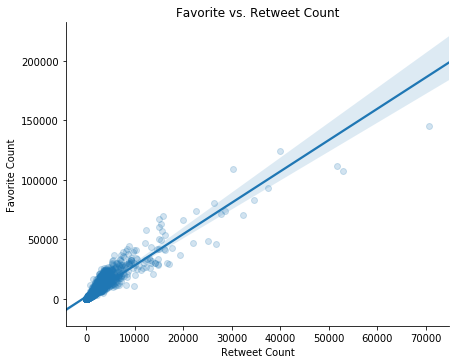

In [118]:
#plotting linear graph of retweet count vs favorite count 
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_clean,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

There is a strong positive linear relationship between favorite count and retweet count. This means tweets that are liked (favorite) are likely to be retweeted. The coefficient for this is 0.93, showing that it is indeed true 

### Common Dog Names 

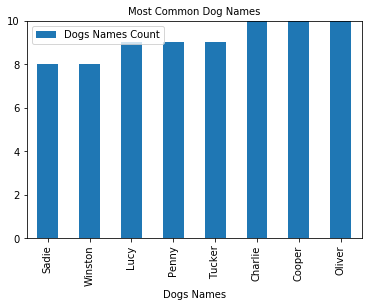

In [116]:
#bar graph of top 10 common dog names 
dog_names = df_clean.query('name == name')
dog_names = dog_names.groupby('name').count()[['tweet_id']]
dog_names_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
dog_names_grouped.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=10)
plt.title("Most Common Dog Names",{'fontsize': 10})
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Count"])

From the above bar graph we can see the top 10 common dog names 

## Spearman Correlation Coefficient Heatmap 

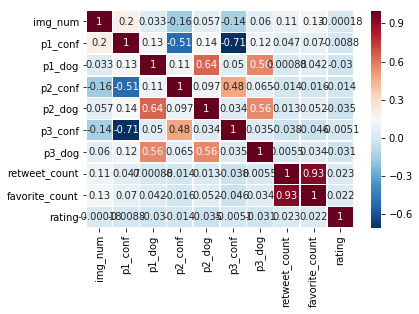

In [117]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)